In [1]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
keras_dataset = keras.datasets.fashion_mnist
#other datasets 'boston_housing', 'california_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters'
(x_train_full , y_train_full), (x_test, y_test) = keras_dataset.load_data()

In [6]:
print('x_train_full shape: ', x_train_full.shape, 'x_train_full type: ', x_train_full.dtype) 
print('y_train_full shape: ', y_train_full.shape, 'y_train_full type: ', y_train_full.dtype) 
print('x_test shape: ', x_test.shape, 'x_test type: ', x_test.dtype) 
print('y_test shape:', y_test.shape, 'y_test type', y_test.dtype)

x_train_full shape:  (60000, 28, 28) x_train_full type:  uint8
y_train_full shape:  (60000,) y_train_full type:  uint8
x_test shape:  (10000, 28, 28) x_test type:  uint8
y_test shape: (10000,) y_test type uint8


In [9]:
x_valid, x_train = x_train_full[50000:] / 255.0, x_train_full[:50000] / 255.0
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]


In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

c:\Users\Paul LeRoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

In [22]:
print(history)

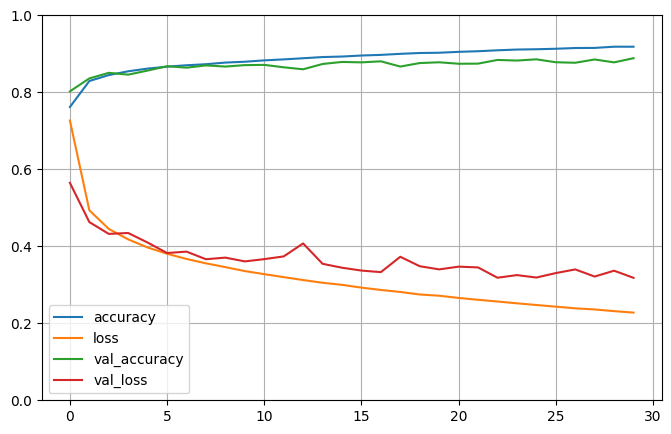

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
model.evaluate(x_test/255, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3368


[0.3366491496562958, 0.8812000155448914]